## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap PING scan (normal)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_ping_scan_normal'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.065506
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    0.065506
1    0.164442
2    0.326346
3    0.056827
4    0.063298
5    0.145610
6    0.053627
7    0.058751
8    0.056476
9    0.061440
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp

,0
0,0.065506
1,0.164442
2,0.326346
3,0.056827
4,0.063298
5,0.145610
6,0.053627
7,0.058751
8,0.056476
9,0.061440


In [8]:
temp.mean()

0    0.105232
dtype: float64

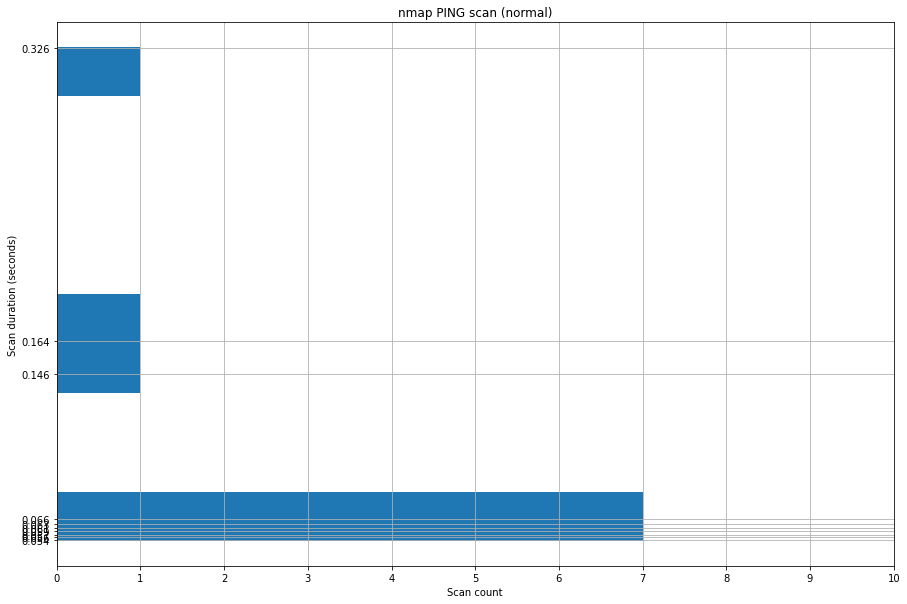

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.105232
std,0.087449
min,0.053627
25%,0.057308
50%,0.062369
75%,0.125584
max,0.326346


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 2104.6457290649414



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 33143 5900
2 33143 143
3 33143 3389
4 33143 23
5 33143 554
6 33143 113
7 33143 111
8 33143 21
9 33143 587
10 33143 53
11 33143 25
12 33143 1025
13 33143 199
14 33143 3306
15 33143 1720
16 33143 443
17 33143 995
18 33143 445
19 33143 110
20 33143 1723
21 33143 993
22 33143 22
23 33143 8080
24 33143 80
25 33143 8888
26 33143 135
27 33143 139
28 33143 256
29 33143 1086
30 33143 5405
31 33143 44501
32 33143 179
33 33143 407
34 33143 8291
35 33143 14441
36 33143 6129
37 33143 3971
38 33143 5566
39 33143 4443
40 33143 5190
41 33143 4224
42 33143 211
43 33143 683
44 33143 27352
45 33143 1051
46 33143 163
47 33143 32782
48 33143 5280
49 33143 711
50 33143 1033
51 33143 9207
52 33143 7937
53 33143 50002
54 33143 5050
55 33143 125
56 33143 1864
57 33143 24800
58 33143 1801
59 33143 3659
60 33143 6969
61 33143 10180
62 33143 65389
63 33143 2002
64 33143 2103
65 33143 1782
66 33143 3269
67 33143 1583
68 33143 1863
69 33143 81
70 33143 5718
71 33143 2500
72 33143 10003
73 33143 6667
74 33143 1998

621 33143 8651
622 33143 1087
623 33143 1043
624 33143 1110
625 33143 55600
626 33143 4003
627 33143 8022
628 33143 5200
629 33143 1100
630 33143 1433
631 33143 7004
632 33143 2107
633 33143 3995
634 33143 1875
635 33143 5100
636 33143 1165
637 33143 1042
638 33143 8011
639 33143 119
640 33143 6389
641 33143 17877
642 33143 6689
643 33143 9003
644 33143 1036
645 33143 30000
646 33143 417
647 33143 41511
648 33143 7103
649 33143 20221
650 33143 555
651 33143 13456
652 33143 3300
653 33143 4449
654 33143 1096
655 33143 3546
656 33143 1039
657 33143 1052
658 33143 1556
659 33143 4848
660 33143 8081
661 33143 1687
662 33143 2383
663 33143 3322
664 33143 514
665 33143 2034
666 33143 5002
667 33143 714
668 33143 1077
669 33143 3918
670 33143 1097
671 33143 2022
672 33143 1417
673 33143 1971
674 33143 7100
675 33143 646
676 33143 8400
677 33143 4126
678 33143 6007
679 33143 512
680 33143 5730
681 33143 35500
682 33143 10626
683 33143 911
684 33143 3390
685 33143 5961
686 33143 37
687 33143 10

223 49728 1047
224 49728 2366
225 49728 10002
226 49728 2105
227 49728 513
228 49728 4004
229 49728 1093
230 49728 1147
231 49728 8181
232 49728 1122
233 49728 545
234 49728 7676
235 49728 1666
236 49728 1094
237 49728 683
238 49728 900
239 49728 1063
240 49728 1352
241 49728 9535
242 49728 8383
243 49728 64680
244 49728 3221
245 49728 49175
246 49728 1056
247 49728 119
248 49728 9876
249 49728 2034
250 49728 9503
251 49728 1217
252 49728 2005
253 49728 1000
254 49728 5221
255 49728 2260
256 49728 48080
257 49728 1062
258 49728 5989
259 49728 1027
260 49728 32777
261 49728 5214
262 49728 3784
263 49728 5915
264 49728 2022
265 49728 64623
266 49728 2251
267 49728 5950
268 49728 311
269 49728 50001
270 49728 16000
271 49728 5998
272 49728 2119
273 49728 406
274 49728 5718
275 49728 17988
276 49728 7000
277 49728 5087
278 49728 21571
279 49728 1131
280 49728 901
281 49728 1113
282 49728 2103
283 49728 1105
284 49728 5004
285 49728 9220
286 49728 6009
287 49728 1112
288 49728 3404
289 4972

788 49728 55055
789 49728 1041
790 49728 1443
791 49728 1079
792 49728 800
793 49728 416
794 49728 3945
795 49728 2048
796 49728 5802
797 49728 8031
798 49728 4848
799 49728 18101
800 49728 20031
801 49728 631
802 49728 16992
803 49728 222
804 49728 3283
805 49728 1067
806 49728 1095
807 49728 873
808 49728 5226
809 49728 2009
810 49728 1801
811 49728 1812
812 49728 6666
813 49728 5811
814 49728 801
815 49728 32773
816 49728 5679
817 49728 10010
818 49728 911
819 49728 2170
820 49728 5405
821 49728 1117
822 49728 541
823 49728 50800
824 49728 1840
825 49728 888
826 49728 70
827 49728 808
828 49728 125
829 49728 1721
830 49728 8600
831 49728 8082
832 49728 24444
833 49728 4003
834 49728 38292
835 49728 2043
836 49728 8007
837 49728 1007
838 49728 8010
839 49728 8500
840 49728 8084
841 49728 6003
842 49728 1030
843 49728 1914
844 49728 3
845 49728 3333
846 49728 50636
847 49728 1024
848 49728 8649
849 49728 280
850 49728 5959
851 49728 9091
852 49728 2135
853 49728 20221
854 49728 26214


401 50366 9877
402 50366 7911
403 50366 5877
404 50366 3905
405 50366 7777
406 50366 1185
407 50366 32775
408 50366 4321
409 50366 705
410 50366 3659
411 50366 2222
412 50366 1094
413 50366 1718
414 50366 5906
415 50366 8194
416 50366 726
417 50366 3268
418 50366 555
419 50366 44501
420 50366 541
421 50366 5225
422 50366 500
423 50366 2022
424 50366 125
425 50366 5961
426 50366 8500
427 50366 1042
428 50366 9080
429 50366 8180
430 50366 1169
431 50366 1047
432 50366 1123
433 50366 20828
434 50366 8400
435 50366 24444
436 50366 3880
437 50366 7201
438 50366 6901
439 50366 1070
440 50366 1186
441 50366 6101
442 50366 407
443 50366 1083
444 50366 5679
445 50366 1082
446 50366 5298
447 50366 1071
448 50366 16000
449 50366 8099
450 50366 9618
451 50366 2323
452 50366 4006
453 50366 9485
454 50366 57797
455 50366 10629
456 50366 1040
457 50366 2040
458 50366 1122
459 50366 12265
460 50366 10002
461 50366 5001
462 50366 27715
463 50366 3369
464 50366 1216
465 50366 161
466 50366 16113
467 503

954 50366 33354
955 50366 666
956 50366 1163
957 50366 6025
958 50366 7007
959 50366 783
960 50366 2043
961 50366 5811
962 50366 999
963 50366 465
964 50366 7937
965 50366 6969
966 50366 2048
967 50366 27355
968 50366 1501
969 50366 425
970 50366 21571
971 50366 2160
972 50366 55056
973 50366 1494
974 50366 545
975 50366 4343
976 50366 8200
977 50366 1132
978 50366 44176
979 50366 32771
980 50366 7402
981 50366 32
982 50366 7920
983 50366 2608
984 50366 2605
985 50366 4550
986 50366 6005
987 50366 65000
988 50366 10628
989 50366 27353
990 50366 50500
991 50366 1658
992 50366 82
993 50366 5950
994 50366 34572
995 50366 10012
996 50366 1864
997 50366 1812
998 50366 3914
999 50366 1151
1000 50366 1033
1 61196 25
2 61196 256
3 61196 111
4 61196 554
5 61196 22
6 61196 3389
7 61196 445
8 61196 199
9 61196 993
10 61196 8080
11 61196 113
12 61196 1025
13 61196 587
14 61196 139
15 61196 80
16 61196 135
17 61196 53
18 61196 21
19 61196 23
20 61196 143
21 61196 995
22 61196 3306
23 61196 1723
24 

620 61196 406
621 61196 254
622 61196 10626
623 61196 8009
624 61196 512
625 61196 1556
626 61196 20
627 61196 19801
628 61196 7002
629 61196 2111
630 61196 4662
631 61196 3128
632 61196 37
633 61196 10616
634 61196 32774
635 61196 161
636 61196 1434
637 61196 56738
638 61196 8085
639 61196 32773
640 61196 1443
641 61196 8082
642 61196 8222
643 61196 1108
644 61196 13456
645 61196 2557
646 61196 16993
647 61196 1126
648 61196 912
649 61196 2251
650 61196 9050
651 61196 44501
652 61196 2800
653 61196 2005
654 61196 9503
655 61196 616
656 61196 4006
657 61196 32782
658 61196 49400
659 61196 1147
660 61196 2046
661 61196 1154
662 61196 3269
663 61196 5222
664 61196 1666
665 61196 1038
666 61196 1501
667 61196 32
668 61196 1043
669 61196 1083
670 61196 2105
671 61196 6566
672 61196 8192
673 61196 514
674 61196 9593
675 61196 7938
676 61196 1040
677 61196 2010
678 61196 5904
679 61196 7435
680 61196 54328
681 61196 25734
682 61196 1166
683 61196 5225
684 61196 1
685 61196 49153
686 61196 44

787 49767 10215
788 49767 1974
789 49767 1114
790 49767 407
791 49767 2602
792 49767 19101
793 49767 3737
794 49767 6005
795 49767 1026
796 49767 3784
797 49767 1839
798 49767 427
799 49767 6346
800 49767 1080
801 49767 8088
802 49767 4662
803 49767 5405
804 49767 714
805 49767 8254
806 49767 14442
807 49767 13783
808 49767 1065
809 49767 6646
810 49767 2049
811 49767 2998
812 49767 4126
813 49767 1062
814 49767 15000
815 49767 880
816 49767 2710
817 49767 8085
818 49767 1044
819 49767 10566
820 49767 8010
821 49767 1310
822 49767 55600
823 49767 1045
824 49767 25735
825 49767 593
826 49767 9011
827 49767 52848
828 49767 49176
829 49767 1688
830 49767 7025
831 49767 1117
832 49767 2638
833 49767 7937
834 49767 37
835 49767 4224
836 49767 6788
837 49767 10616
838 49767 1102
839 49767 48080
840 49767 1900
841 49767 4003
842 49767 19350
843 49767 2030
844 49767 50636
845 49767 7778
846 49767 5999
847 49767 726
848 49767 7938
849 49767 1071
850 49767 2366
851 49767 32781
852 49767 1132
853

453 61665 2800
454 61665 7937
455 61665 9593
456 61665 50002
457 61665 668
458 61665 636
459 61665 1082
460 61665 990
461 61665 3517
462 61665 33354
463 61665 8600
464 61665 8002
465 61665 1328
466 61665 8701
467 61665 1217
468 61665 1277
469 61665 1974
470 61665 340
471 61665 7106
472 61665 50389
473 61665 3878
474 61665 1296
475 61665 5431
476 61665 6666
477 61665 6566
478 61665 5566
479 61665 389
480 61665 416
481 61665 2718
482 61665 5963
483 61665 6106
484 61665 11110
485 61665 1147
486 61665 1090
487 61665 7001
488 61665 7777
489 61665 1038
490 61665 6129
491 61665 4343
492 61665 1041
493 61665 2251
494 61665 555
495 61665 10012
496 61665 544
497 61665 2702
498 61665 2005
499 61665 6667
500 61665 5907
501 61665 5988
502 61665 2034
503 61665 8089
504 61665 2021
505 61665 2383
506 61665 55600
507 61665 524
508 61665 8994
509 61665 3322
510 61665 1175
511 61665 16018
512 61665 50500
513 61665 714
514 61665 3351
515 61665 3211
516 61665 6646
517 61665 5961
518 61665 1972
519 61665 36

120 64681 4446
121 64681 2009
122 64681 8222
123 64681 7070
124 64681 4998
125 64681 1093
126 64681 48080
127 64681 6580
128 64681 4550
129 64681 8300
130 64681 1074
131 64681 5633
132 64681 2105
133 64681 6
134 64681 32781
135 64681 52848
136 64681 9575
137 64681 1011
138 64681 9998
139 64681 16016
140 64681 8085
141 64681 9110
142 64681 1080
143 64681 4343
144 64681 7435
145 64681 2103
146 64681 7002
147 64681 2393
148 64681 3128
149 64681 7920
150 64681 50300
151 64681 8045
152 64681 9091
153 64681 843
154 64681 2068
155 64681 5679
156 64681 1102
157 64681 16018
158 64681 5226
159 64681 9943
160 64681 524
161 64681 2111
162 64681 1247
163 64681 1287
164 64681 3221
165 64681 5050
166 64681 5811
167 64681 1217
168 64681 31337
169 64681 340
170 64681 9200
171 64681 144
172 64681 5009
173 64681 4002
174 64681 5002
175 64681 1862
176 64681 7443
177 64681 32775
178 64681 43
179 64681 1071
180 64681 1149
181 64681 6389
182 64681 15742
183 64681 2702
184 64681 10629
185 64681 1126
186 64681

786 64681 2525
787 64681 1322
788 64681 1864
789 64681 6792
790 64681 1082
791 64681 7001
792 64681 2010
793 64681 50636
794 64681 8008
795 64681 5678
796 64681 1461
797 64681 49400
798 64681 9009
799 64681 146
800 64681 2383
801 64681 3351
802 64681 705
803 64681 1494
804 64681 7778
805 64681 2099
806 64681 32777
807 64681 3918
808 64681 541
809 64681 2022
810 64681 3476
811 64681 1094
812 64681 5102
813 64681 2288
814 64681 3580
815 64681 9503
816 64681 19
817 64681 61900
818 64681 1186
819 64681 1556
820 64681 5959
821 64681 52822
822 64681 1059
823 64681 2875
824 64681 3766
825 64681 3690
826 64681 3261
827 64681 1073
828 64681 2035
829 64681 5901
830 64681 32785
831 64681 88
832 64681 30951
833 64681 8001
834 64681 406
835 64681 8652
836 64681 7999
837 64681 16001
838 64681 3
839 64681 1236
840 64681 5060
841 64681 2042
842 64681 1072
843 64681 711
844 64681 161
845 64681 9917
846 64681 5802
847 64681 2170
848 64681 1064
849 64681 222
850 64681 24
851 64681 617
852 64681 106
853 6

453 44162 1044
454 44162 1914
455 44162 2049
456 44162 2525
457 44162 5859
458 44162 631
459 44162 9040
460 44162 5405
461 44162 7200
462 44162 81
463 44162 1556
464 44162 9071
465 44162 2046
466 44162 1494
467 44162 6003
468 44162 7103
469 44162 1032
470 44162 5269
471 44162 211
472 44162 8086
473 44162 8081
474 44162 6692
475 44162 3333
476 44162 7001
477 44162 89
478 44162 60443
479 44162 4567
480 44162 1105
481 44162 4006
482 44162 9099
483 44162 6059
484 44162 10009
485 44162 3300
486 44162 880
487 44162 7004
488 44162 1083
489 44162 5080
490 44162 5679
491 44162 2002
492 44162 2179
493 44162 3371
494 44162 1352
495 44162 6346
496 44162 389
497 44162 15003
498 44162 1503
499 44162 711
500 44162 3814
501 44162 555
502 44162 1052
503 44162 1024
504 44162 5850
505 44162 1061
506 44162 19101
507 44162 144
508 44162 55600
509 44162 2222
510 44162 3800
511 44162 1594
512 44162 843
513 44162 3889
514 44162 49155
515 44162 720
516 44162 5877
517 44162 2710
518 44162 14442
519 44162 8402
5

119 45158 49157
120 45158 1328
121 45158 5902
122 45158 1068
123 45158 5952
124 45158 27355
125 45158 3052
126 45158 64680
127 45158 2809
128 45158 1045
129 45158 1060
130 45158 1971
131 45158 9485
132 45158 7004
133 45158 8873
134 45158 8084
135 45158 7496
136 45158 8082
137 45158 1087
138 45158 20
139 45158 55600
140 45158 9200
141 45158 3300
142 45158 32770
143 45158 1141
144 45158 6123
145 45158 7627
146 45158 407
147 45158 1301
148 45158 3659
149 45158 4449
150 45158 1805
151 45158 19780
152 45158 2033
153 45158 49400
154 45158 2135
155 45158 1198
156 45158 16113
157 45158 10001
158 45158 2800
159 45158 5061
160 45158 212
161 45158 52673
162 45158 8087
163 45158 15000
164 45158 5050
165 45158 7007
166 45158 6001
167 45158 1600
168 45158 1147
169 45158 2200
170 45158 6901
171 45158 9009
172 45158 9575
173 45158 1026
174 45158 9503
175 45158 3827
176 45158 13722
177 45158 44501
178 45158 2100
179 45158 5631
180 45158 24444
181 45158 9091
182 45158 5815
183 45158 1092
184 45158 6002


786 45158 1309
787 45158 38292
788 45158 10012
789 45158 683
790 45158 8291
791 45158 4001
792 45158 2010
793 45158 7001
794 45158 2605
795 45158 2191
796 45158 3809
797 45158 3031
798 45158 7019
799 45158 2004
800 45158 6106
801 45158 1259
802 45158 3077
803 45158 9998
804 45158 7070
805 45158 3871
806 45158 49152
807 45158 2107
808 45158 31337
809 45158 32773
810 45158 9071
811 45158 5102
812 45158 543
813 45158 2106
814 45158 1061
815 45158 3301
816 45158 711
817 45158 7512
818 45158 2043
819 45158 10628
820 45158 1556
821 45158 9040
822 45158 8002
823 45158 900
824 45158 1035
825 45158 1972
826 45158 5862
827 45158 1124
828 45158 27000
829 45158 2042
830 45158 3880
831 45158 1048
832 45158 3007
833 45158 880
834 45158 6100
835 45158 50001
836 45158 2006
837 45158 2910
838 45158 49163
839 45158 3766
840 45158 783
841 45158 1095
842 45158 8007
843 45158 2383
844 45158 458
845 45158 49158
846 45158 9010
847 45158 30
848 45158 8333
849 45158 4443
850 45158 1122
851 45158 100
852 45158 

452 57078 2718
453 57078 10010
454 57078 32778
455 57078 1721
456 57078 1147
457 57078 4006
458 57078 1783
459 57078 259
460 57078 1078
461 57078 51103
462 57078 1107
463 57078 6346
464 57078 54328
465 57078 55055
466 57078 5550
467 57078 31038
468 57078 1309
469 57078 146
470 57078 10243
471 57078 3737
472 57078 4005
473 57078 1594
474 57078 1301
475 57078 1782
476 57078 1034
477 57078 2170
478 57078 9917
479 57078 3211
480 57078 1117
481 57078 7921
482 57078 880
483 57078 7007
484 57078 55555
485 57078 15660
486 57078 2068
487 57078 35500
488 57078 1580
489 57078 16016
490 57078 3971
491 57078 1974
492 57078 10628
493 57078 1035
494 57078 3889
495 57078 2046
496 57078 2048
497 57078 1152
498 57078 5877
499 57078 79
500 57078 32773
501 57078 8291
502 57078 65389
503 57078 5718
504 57078 2047
505 57078 2557
506 57078 25735
507 57078 42510
508 57078 50001
509 57078 32785
510 57078 2301
511 57078 1079
512 57078 1106
513 57078 4045
514 57078 3369
515 57078 6689
516 57078 17988
517 57078 9

In [15]:
orders_port

,scannr,sport,dport
0,1,33143,5900
1,2,33143,143
2,3,33143,3389
3,4,33143,23
4,5,33143,554
...,...,...,...
9995,996,57078,2701
9996,997,57078,6779
9997,998,57078,902
9998,999,57078,5440


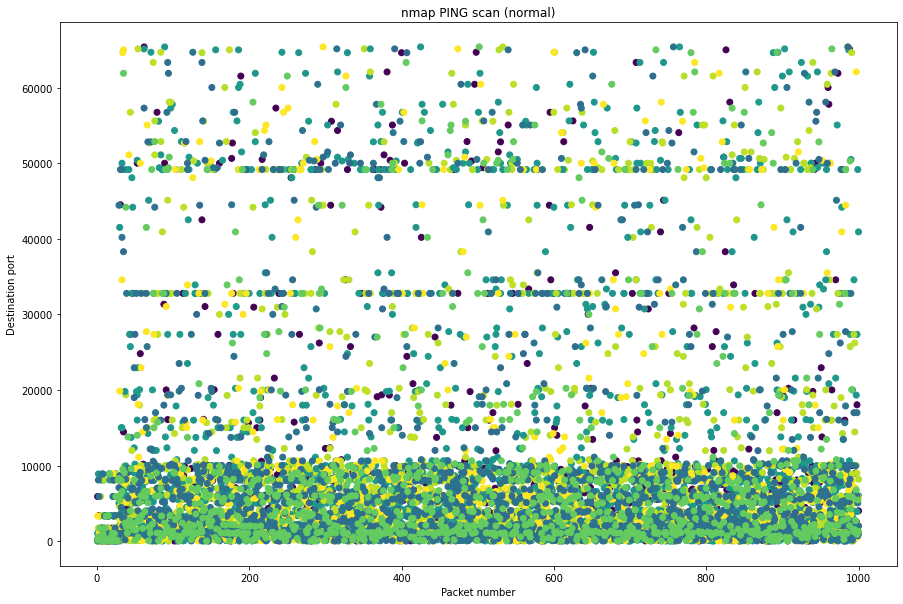

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

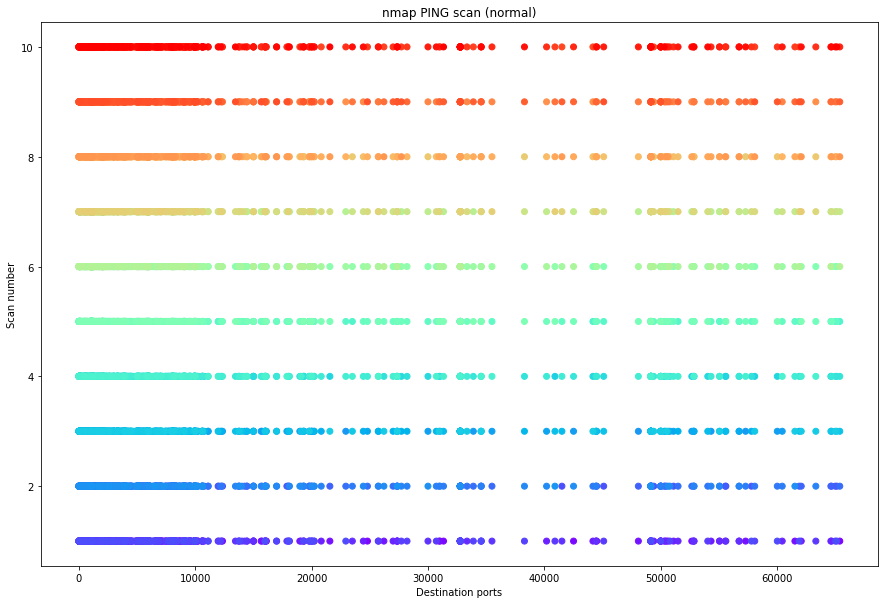

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

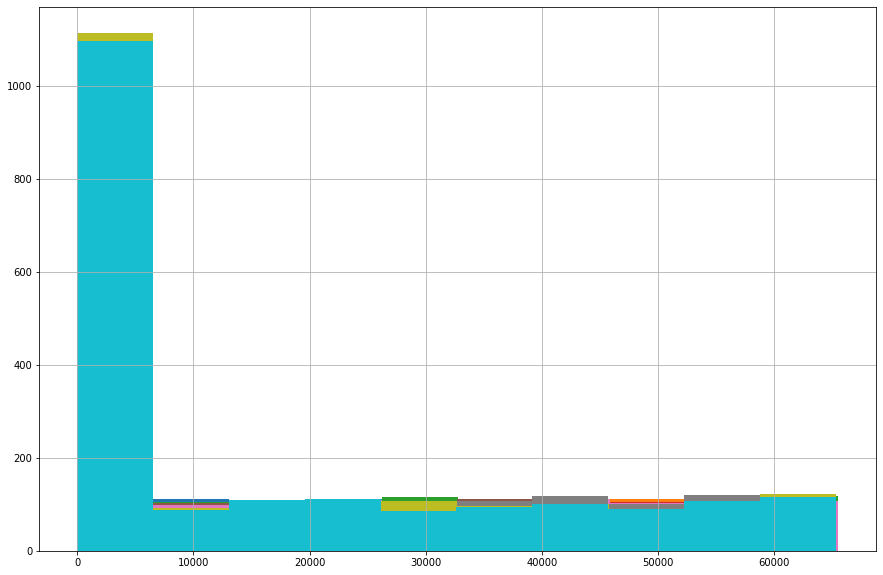

In [21]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

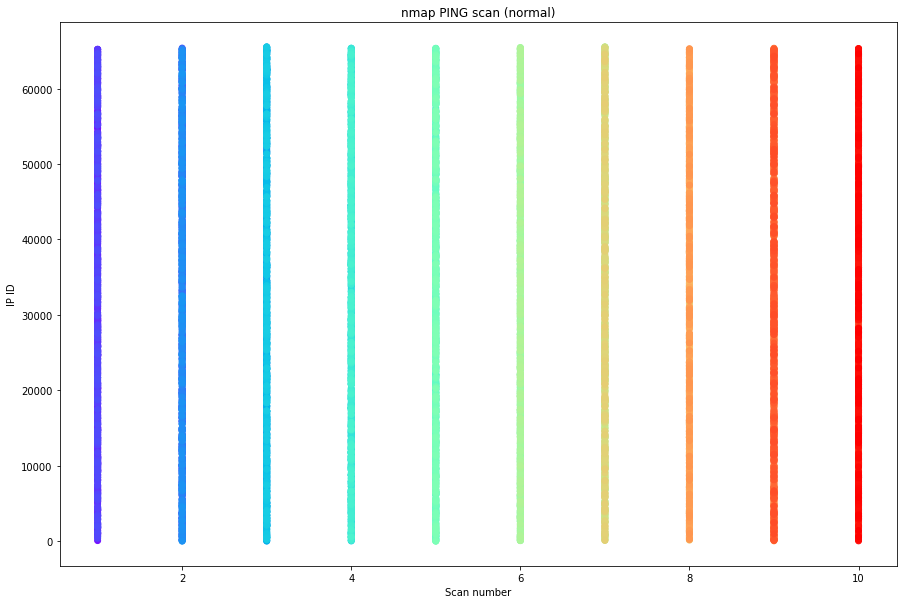

In [22]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


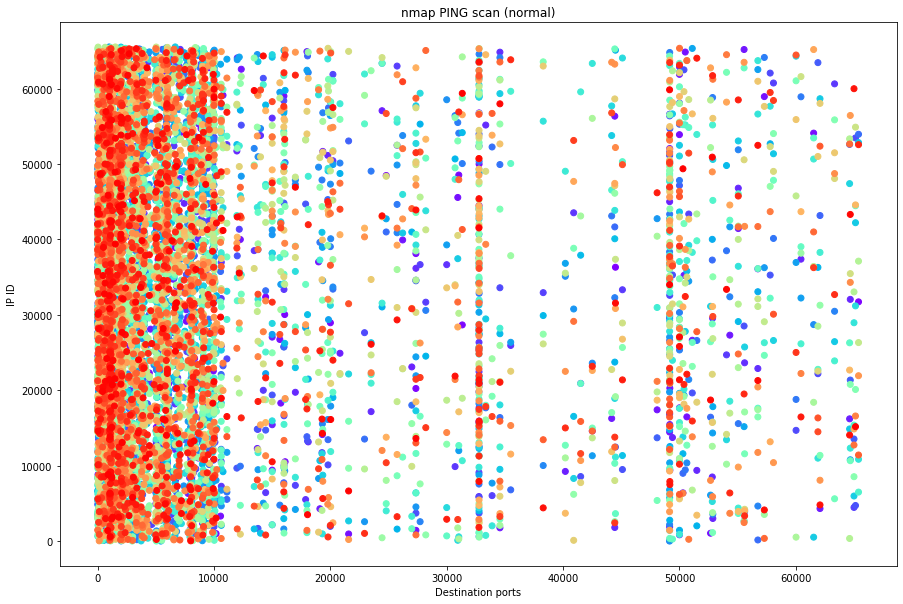

In [23]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

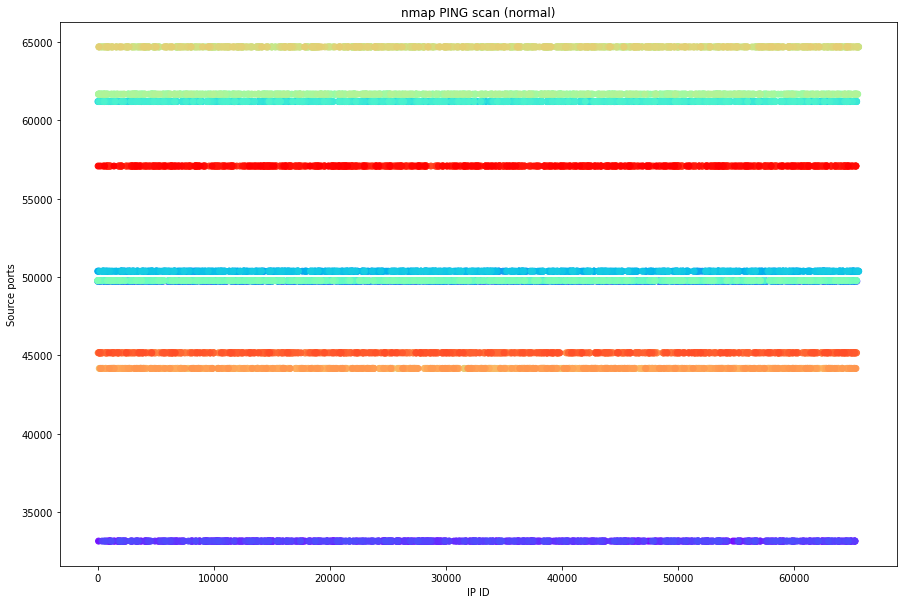

In [24]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 354

Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 3544074795
Sequence number: 354

Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 3763525953
Sequence number: 376

Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 2264126272
Sequence number: 226

Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 3247056422
Sequence number: 324

Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 3859282149
Sequence number: 385

Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 2160168965
Sequence number: 216

Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 2754314761
Sequence number: 275

Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 1510956650
Sequence number: 151

Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 1969660229
Sequence number: 196

Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 2093575330
Sequence number: 209

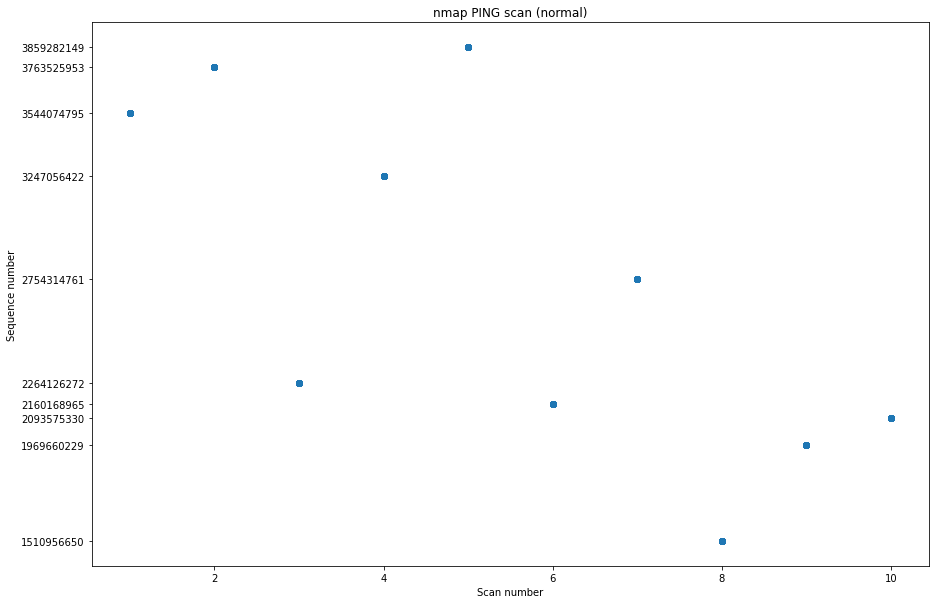

In [28]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


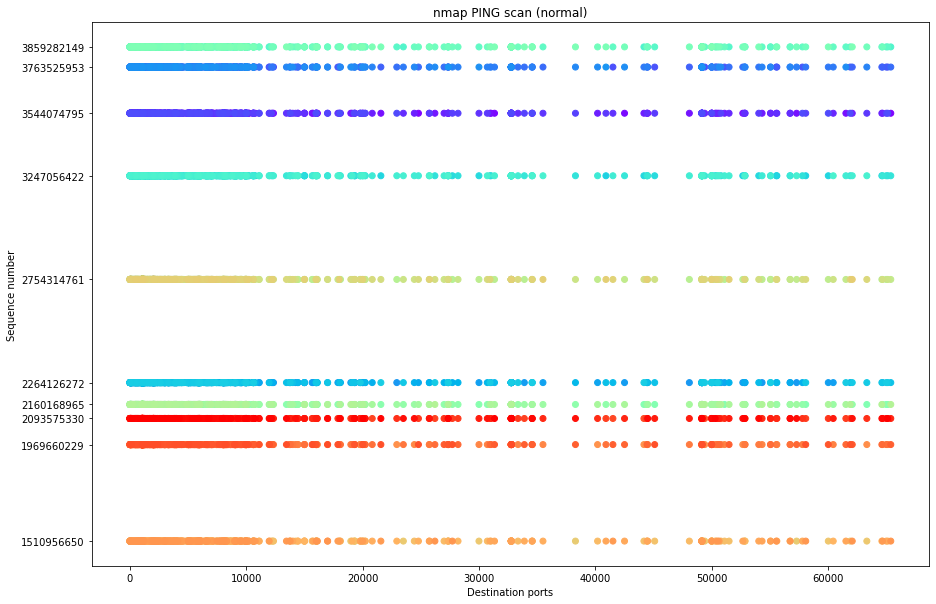

In [29]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

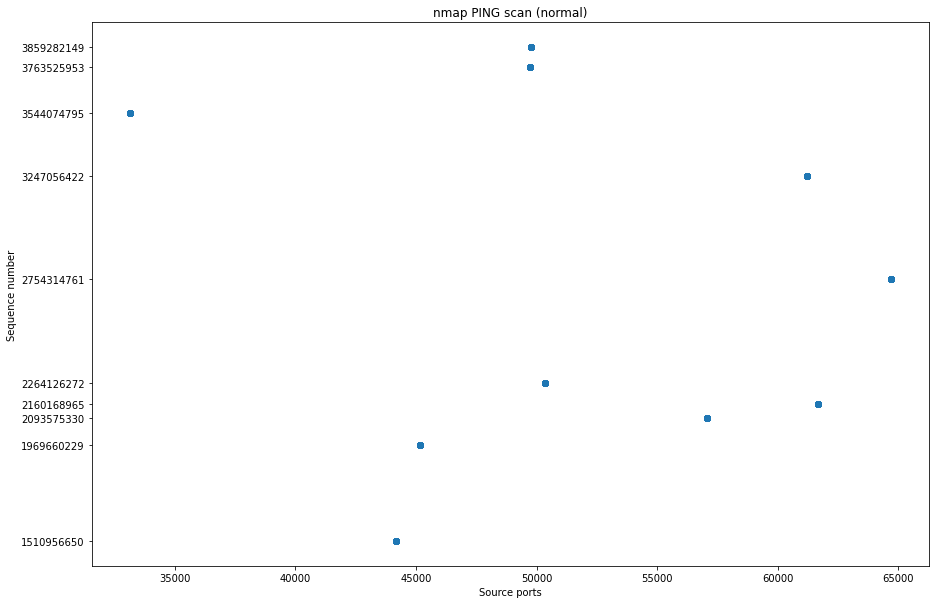

In [30]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [31]:
len(set(orders_port['sport']))

10

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
-----
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flag

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F